## Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image
import cv2
import requests

In [3]:
from flask_app.commons import util

In [4]:
%load_ext autoreload
%autoreload 2

## Sample Images

In [5]:
source = Image.open('../demo_file/Kianboon_cropped.jpg')
ref = Image.open('../demo_file/samurai.jpg')

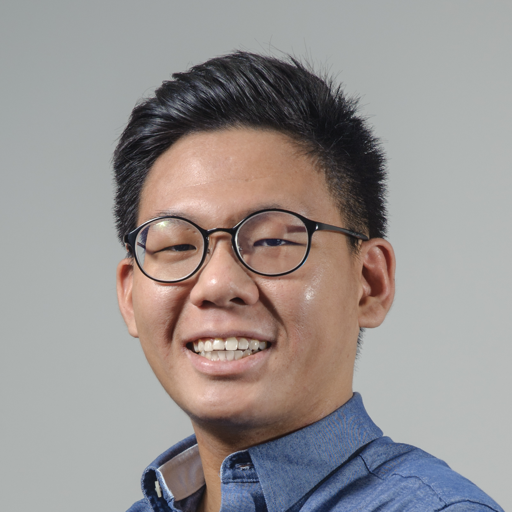

In [6]:
source.thumbnail((512,512))
source

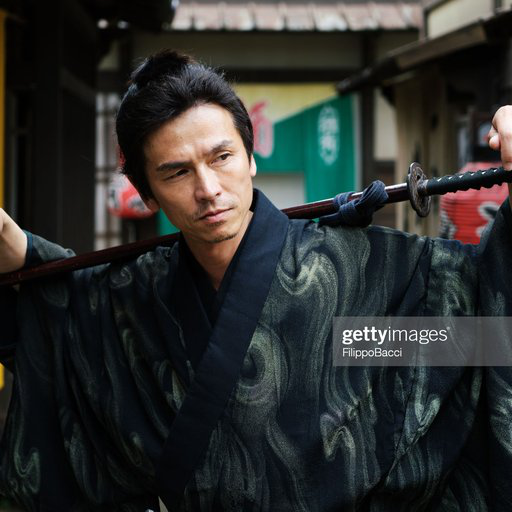

In [7]:
ref.thumbnail((512,512))
ref

## SimSwap

### Sample Call

In [8]:
URL = "http://10.2.117.32:5001/predict"

__First Call (Will be a bit slower)__

In [9]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref)
}

In [10]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 6.01 ms, sys: 3.79 ms, total: 9.81 ms
Wall time: 1.11 s


In [11]:
response_json = response.json()

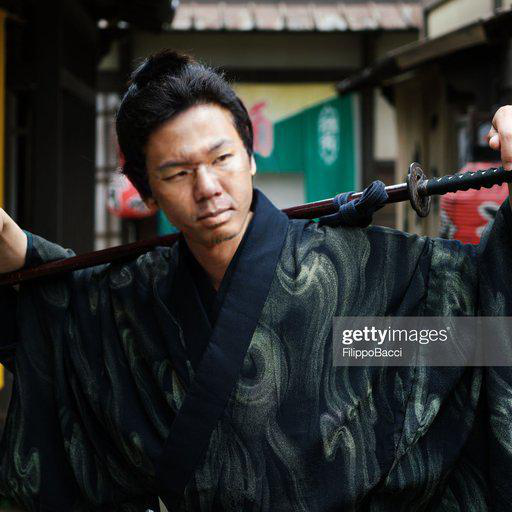

In [12]:
util.base64_to_image(response_json['output_img'])

__Second Call__

In [13]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.34 ms, sys: 198 µs, total: 5.54 ms
Wall time: 222 ms


### Another Sample

In [14]:
ref = Image.open('../demo_file/elf.jpg')

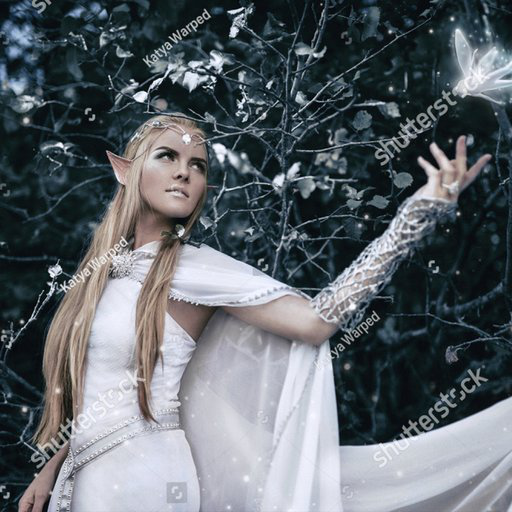

In [15]:
ref.thumbnail((720,720))
ref

In [16]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref)
}

In [17]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 6.24 ms, sys: 346 µs, total: 6.58 ms
Wall time: 217 ms


In [18]:
response_json = response.json()

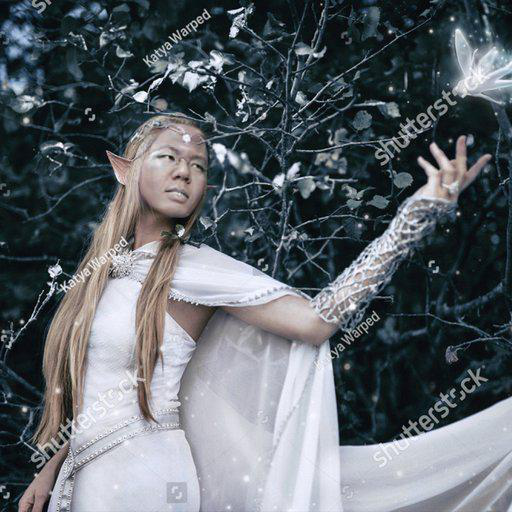

In [19]:
util.base64_to_image(response_json['output_img'])

### Test Face Not Detected Error

In [20]:
source = Image.open('../demo_file/src/3.jpg')

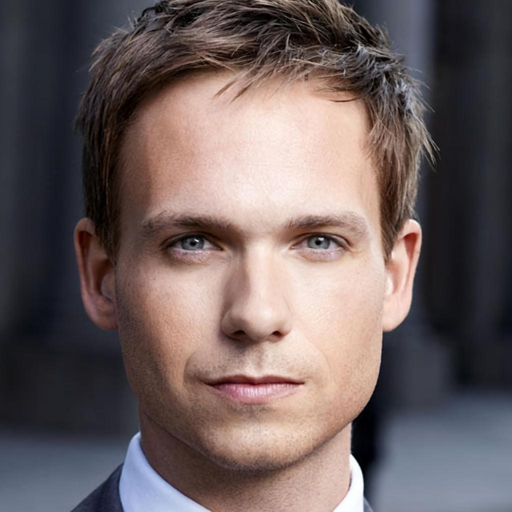

In [21]:
source.thumbnail((512,512))
source

In [22]:
payload = {
    'src_img': util.image_to_base64(source),
    'ref_img': util.image_to_base64(ref)
}

In [23]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.53 ms, sys: 249 µs, total: 5.78 ms
Wall time: 72.5 ms


In [24]:
response.json()

{'error': 'Face not detected in source image'}

## Face Detection

### Sample Call

In [25]:
URL = "http://10.2.117.32:5001/detect"

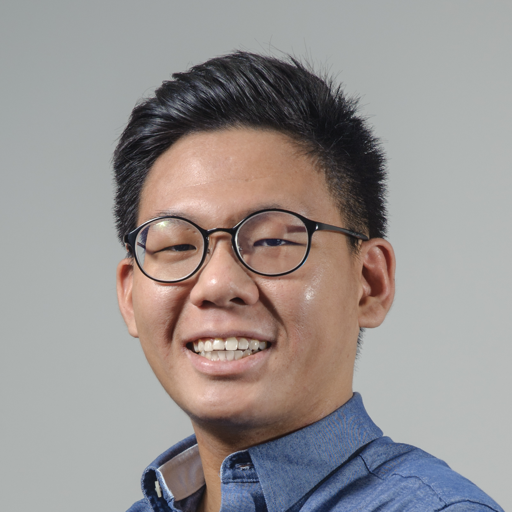

In [26]:
img = Image.open('../demo_file/Kianboon_cropped.jpg')
img.thumbnail((512,512))
img

In [27]:
payload = {
    'img': util.image_to_base64(img)
}

In [28]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 4.02 ms, sys: 0 ns, total: 4.02 ms
Wall time: 90.8 ms


In [29]:
response_json = response.json()

In [30]:
response_json

{'bounding_box': {'x1': 131, 'x2': 356, 'y1': 128, 'y2': 419},
 'is_face_detected': True,
 'score': 0.8313328623771667}

#### Visualize bounding box

In [43]:
def visualize_bbox(img, bbox) -> Image.Image:
    img_cv = util.pil_to_cv2(img)
    x1 = bbox['x1']
    y1 = bbox['y1']
    x2 = bbox['x2']
    y2 = bbox['y2']
    img_cv = cv2.rectangle(img_cv, (x1, y1), (x2,y2), (0, 255, 0))
    return util.cv2_to_pil(img_cv)

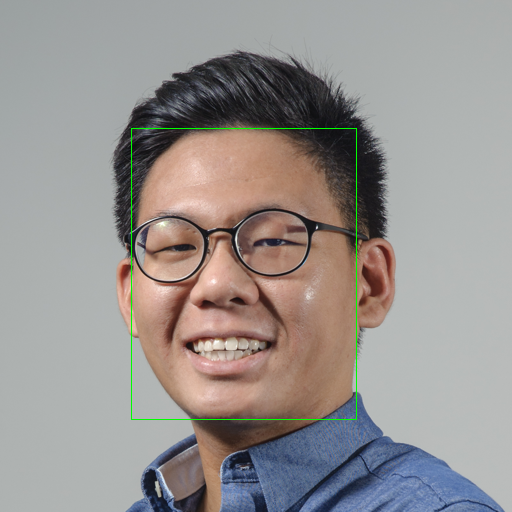

In [36]:
visualize_bbox(img, response_json['bounding_box'])

### Another Sample

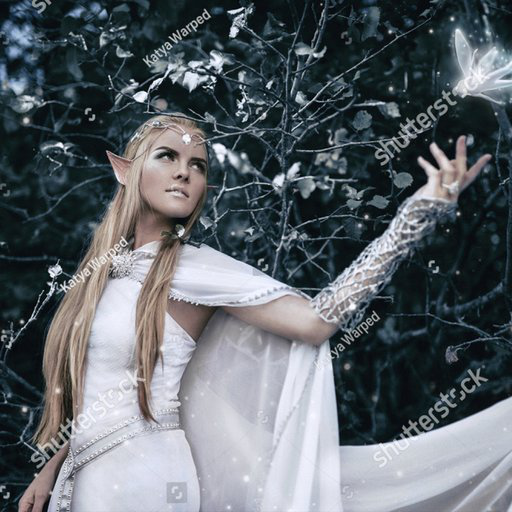

In [46]:
img = Image.open('../demo_file/elf.jpg')
img.thumbnail((512,512))
img

In [47]:
payload = {
    'img': util.image_to_base64(img)
}

In [48]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 4.75 ms, sys: 103 µs, total: 4.86 ms
Wall time: 93.9 ms


In [49]:
response_json = response.json()

In [50]:
response_json

{'bounding_box': {'x1': 137, 'x2': 208, 'y1': 129, 'y2': 216},
 'is_face_detected': True,
 'score': 0.7600653767585754}

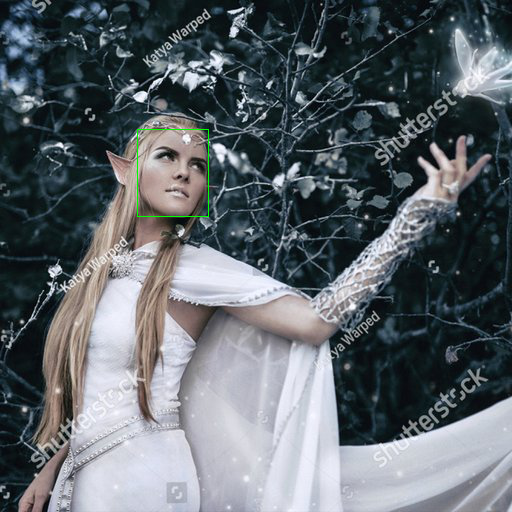

In [51]:
visualize_bbox(img, response_json['bounding_box'])

### Test Face not detected

In [52]:
img = Image.open('../demo_file/src/3.jpg')

In [53]:
payload = {
    'img': util.image_to_base64(img)
}

In [54]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.36 ms, sys: 254 µs, total: 5.62 ms
Wall time: 104 ms


In [55]:
response_json = response.json()

In [56]:
response_json

{'is_face_detected': False}